# Predict the Introverts from the Extroverts

**Overview**

Welcome to the 2025 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting and approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

**Your Goal**: Your objective is to predict whether a person is an Introvert or Extrovert, given their social behavior and personality traits.

# Step 1:Import all necessary libaries

In [100]:
# import necessary libaries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [101]:
# Step 2: Loading and Understanding the datasets

In [102]:
# reading the csv files
train_df = pd.read_csv("train(3).csv")
test_df = pd.read_csv("test(2).csv")
sample_submission = pd.read_csv("sample_submission(1).csv")

In [103]:
#  previwing the first five row in the train dataset
print("Preview of the first five  train dataset")
display(train_df.head(5))

Preview of the first five  train dataset


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [104]:
#  previwing the first five row in the test dataset
print("Preview of the first five  test dataset")
display(test_df.head(5))

Preview of the first five  test dataset


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [105]:
#  previwing the first five row in the sample submission dataset
print("Preview of the first five  sample submission dataset")
display(sample_submission.head(5))


Preview of the first five  sample submission dataset


,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Extrovert


In [106]:
# checking the train dataset info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


**Observation:**
- THis means that the data has 5 floating digits, 3 object which are also called the categorical columns and 1 integer

In [107]:
#  checking thew train dataset columns
train_df.columns
columns = ['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality']

In [108]:
#  checking the shape of the train dataset
train_df.shape

# printing out the shape of the two datasets
print(f"The train dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns")
print(f"The train dataset has {test_df.shape[0]} rows and {test_df.shape[1]} columns")

The train dataset has 18524 rows and 9 columns
The train dataset has 6175 rows and 8 columns


In [109]:
# checking out for duplictes
print(f"There are {train_df.duplicated().sum()} duplicates in the train dataset")
print(f"There are {test_df.duplicated().sum()} duplicates in the test dataset")

There are 0 duplicates in the train dataset
There are 0 duplicates in the test dataset


In [110]:
# checking the missing values
missing_values = train_df.isnull().sum()

In [111]:
missing_percentage = missing_values / len(train_df) * 100

In [112]:
missing_values_df = pd.DataFrame({"Missing Values": missing_values, "Missing Values Percentage": missing_percentage})

In [113]:
missing_values_df

,Missing Values,Missing Values Percentage
id,0,0.000000
Time_spent_Alone,1190,6.424098
Stage_fear,1893,10.219175
Social_event_attendance,1180,6.370114
Going_outside,1466,7.914057
Drained_after_socializing,1149,6.202764
Friends_circle_size,1054,5.689916
Post_frequency,1264,6.823580
Personality,0,0.000000


**The above is the percentage of the missing value**

# Exploratory Data Analysis

In [114]:
train_df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [115]:
num_col = ["Time_spent_Alone", "Social_event_attendance", "Going_outside", "Friends_circle_size", "Post_frequency"]

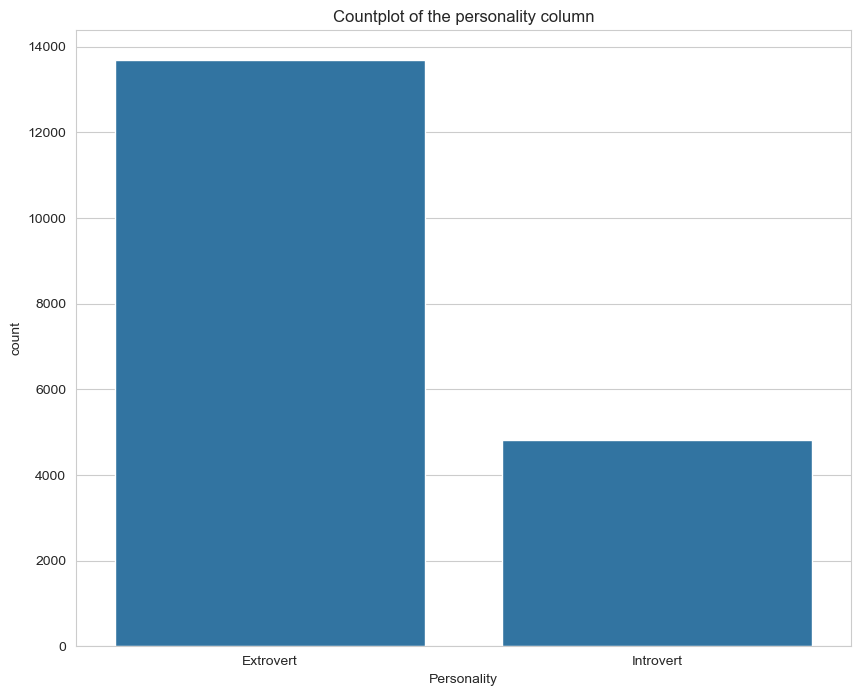

In [147]:
# visualizing the countplot of the personality column
plt.figure(figsize=(10, 8))
sns.countplot(data=train_df, x="Personality")
plt.title("Countplot of the personality column")
plt.show()

In [148]:
train_df["Personality"].value_counts()

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

**Observation:**
- We can deduce from the visualisation that there are more extrovert than the introvert in the dataset

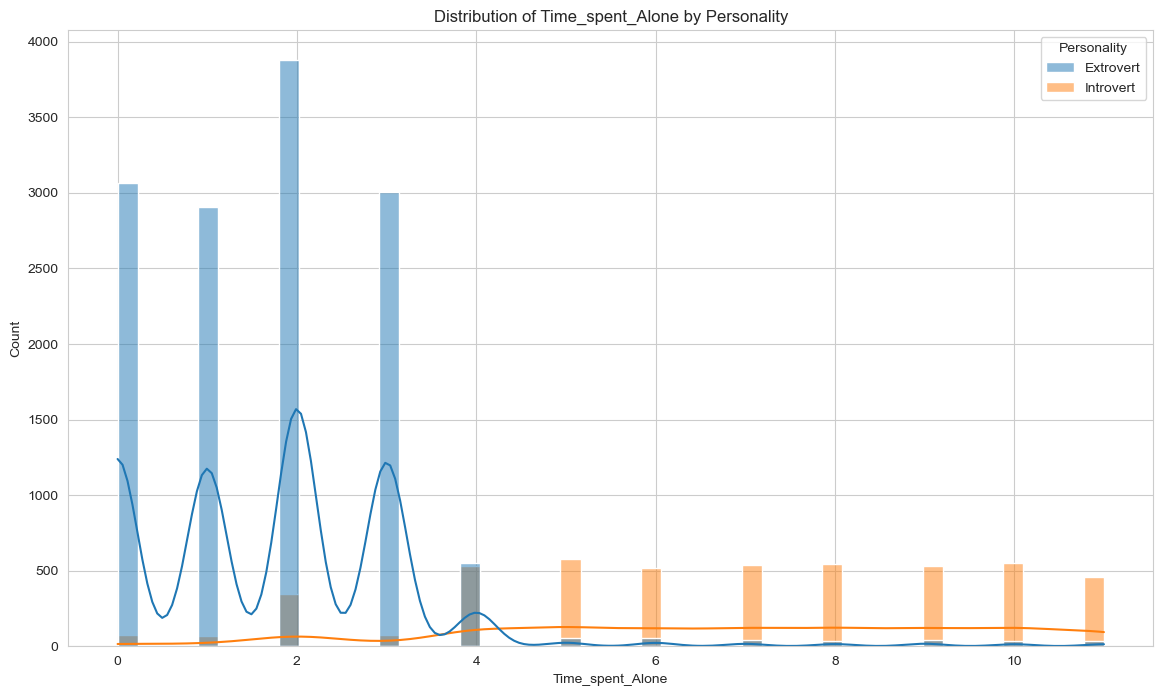

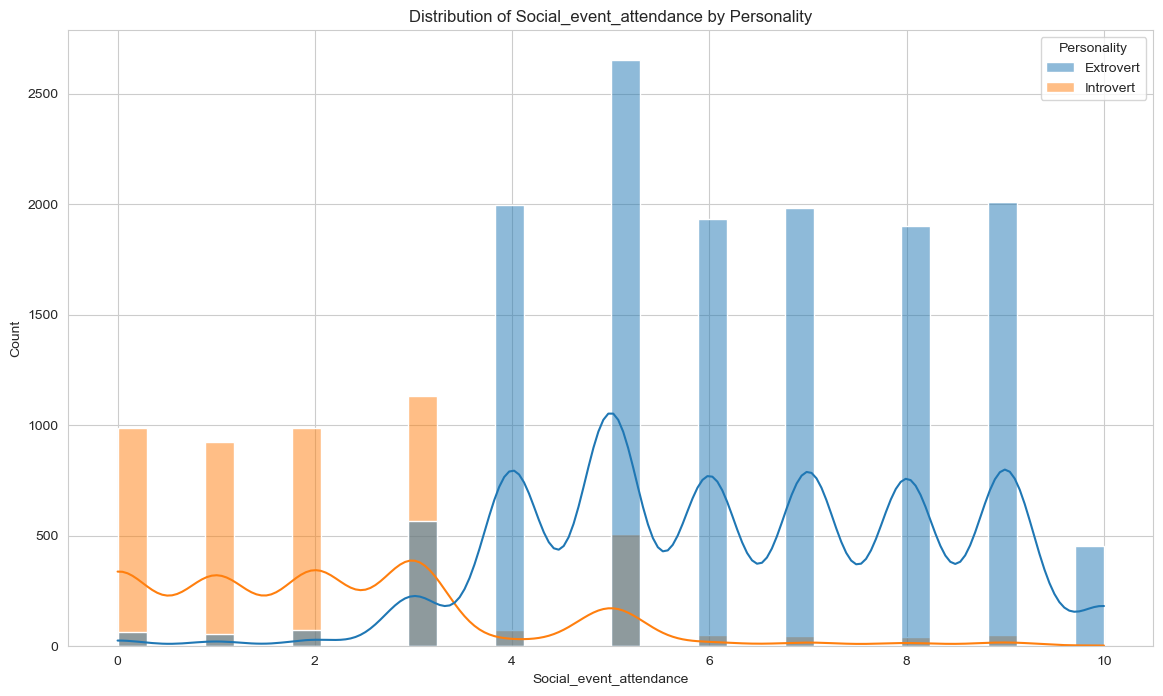

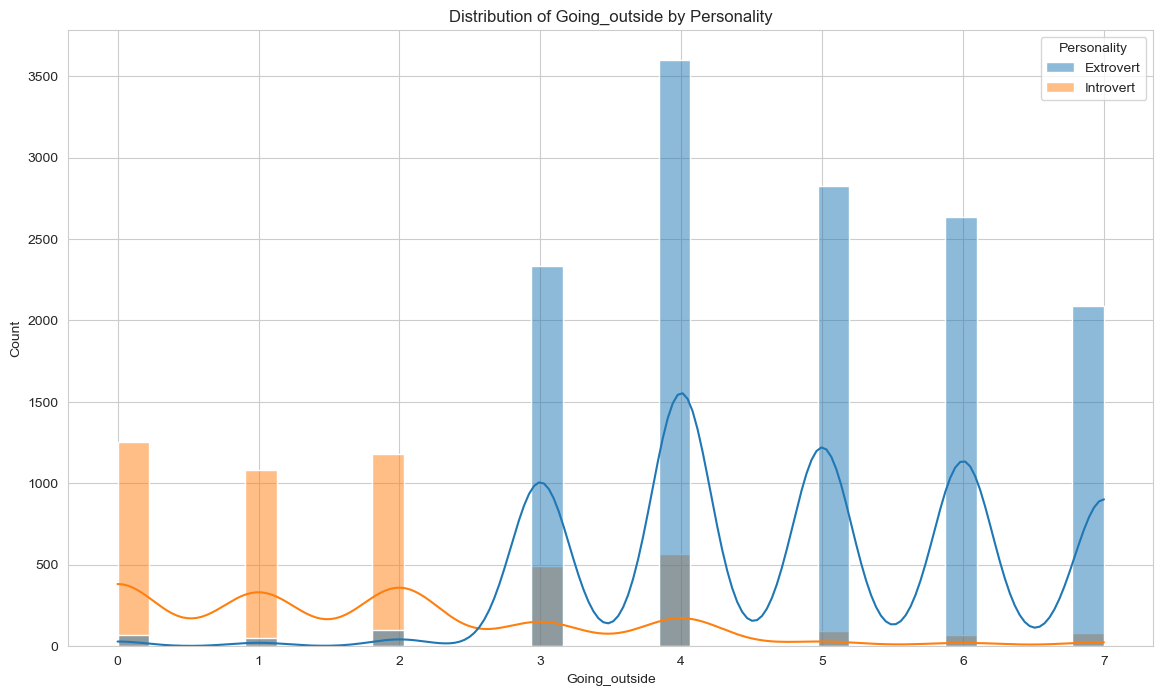

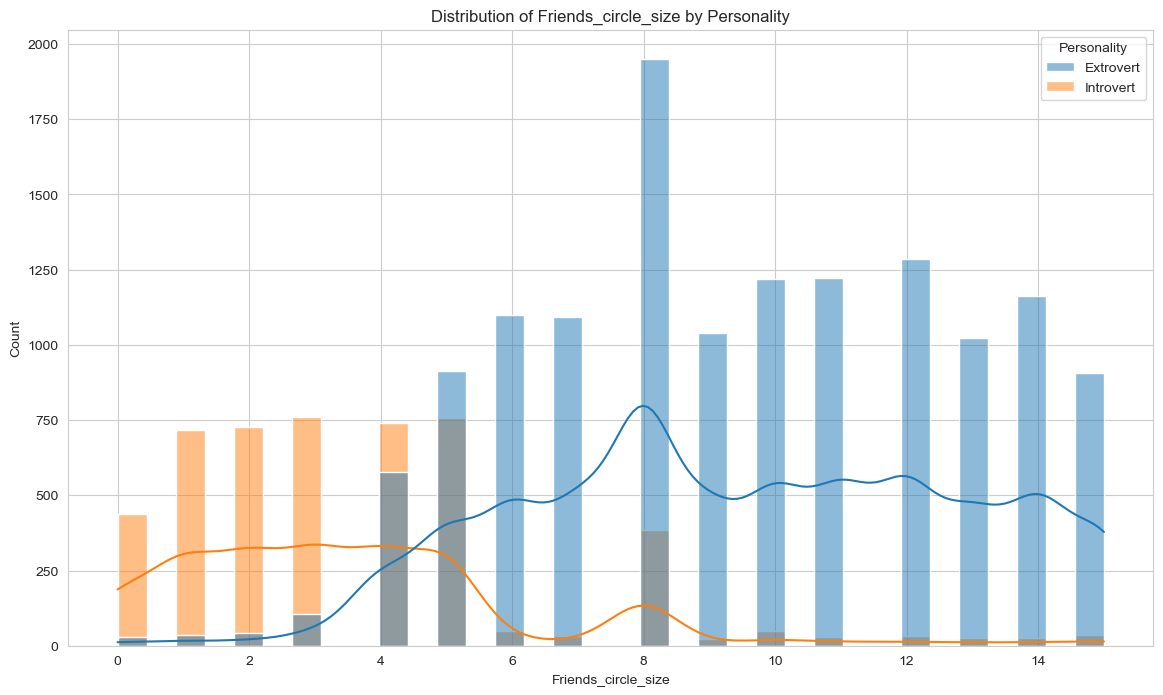

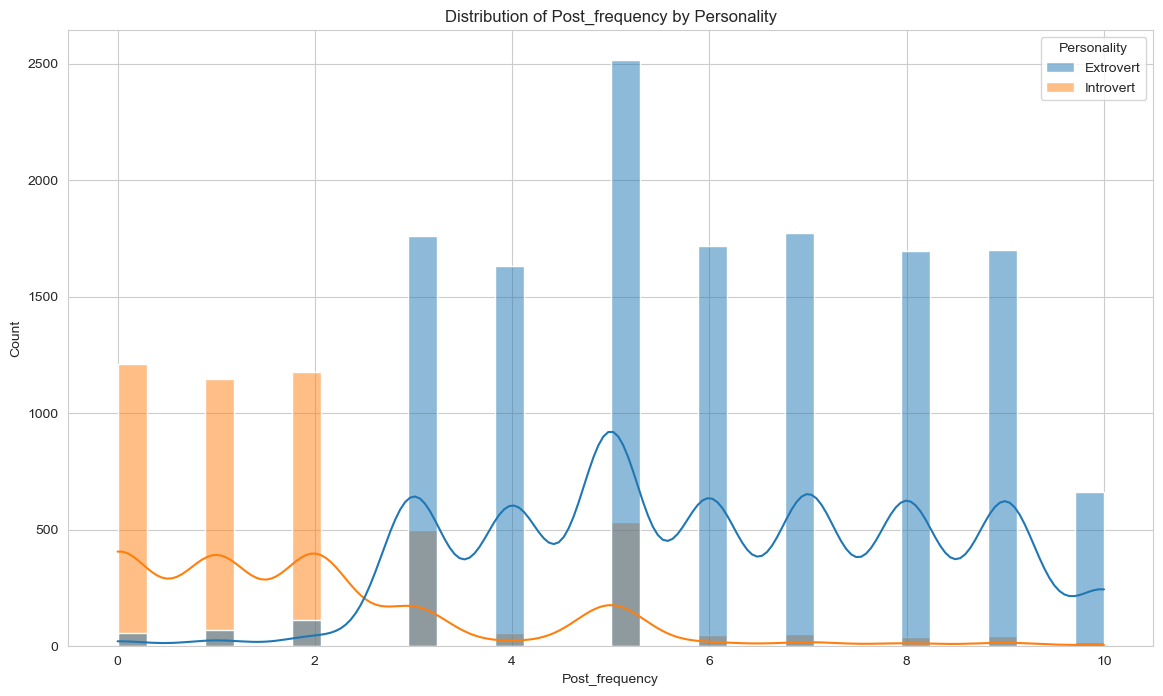

In [149]:
# Loop through all the numeric column
for col in num_col:
    
    plt.figure(figsize=(14, 8))
    sns.histplot(data=train_df, x=col, kde=True, hue="Personality", legend=True)
    plt.title(f"Distribution of {col} by Personality")
    plt.show()

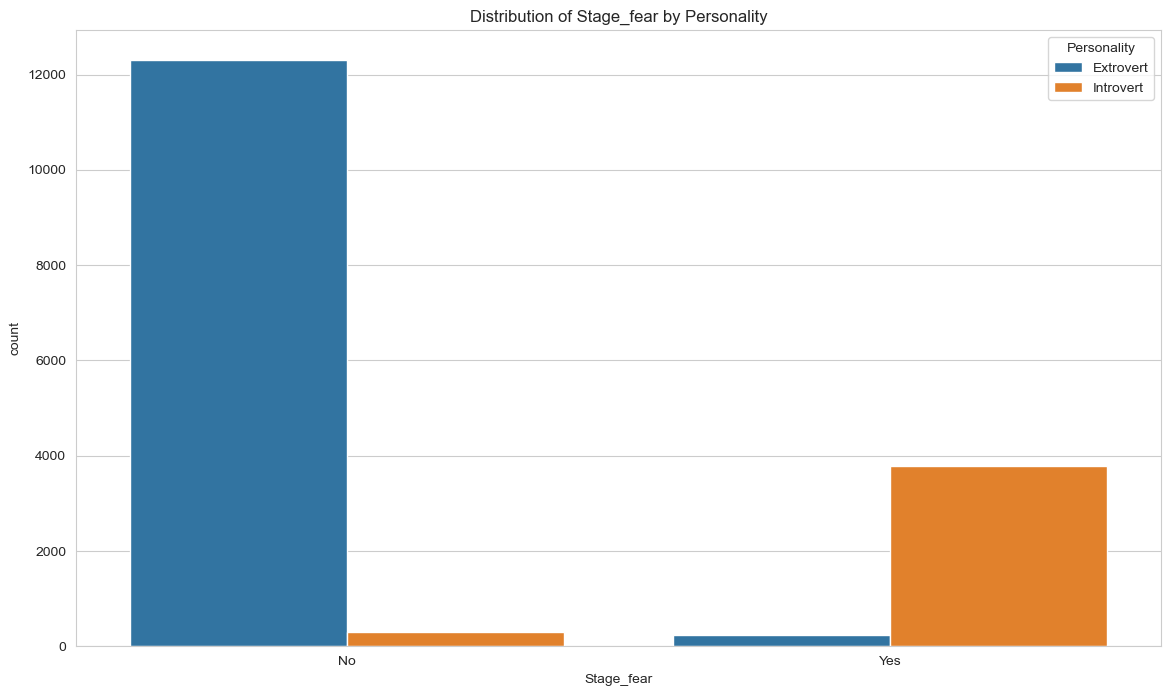

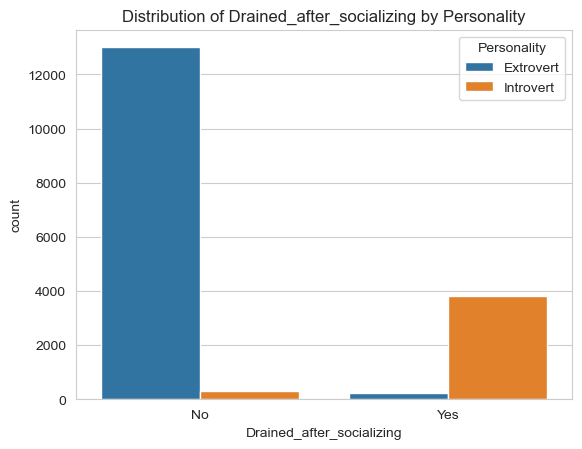

In [151]:
# visualisation of the categorical columns
cate_col = ["Stage_fear", "Drained_after_socializing"]

# the figure of the graph
plt.figure(figsize=(14, 8))
# plottingnthe greaph
for col in cate_col:
    sns.countplot(data=train_df, x=col, hue="Personality", legend=True)
    plt.title(f"Distribution of {col} by Personality")
    plt.show()

**Key Insight:**

- Firstly, from the countplot visualization, we can see that the Extrovert are hugher than the introvert
- Secondly, the introvert spends 4-10hrs alone while the extrovert spends 0-2hrs alone, which menas that the introvert are prone to spending most of there time alone.
- Thridly, the extrovert are more socialized than the introvert(i.e they interact in the public than the introvert). Additionally, the extrovert go outside more than the introvert.
- Fourthly, since the intovert are less socialize than the extrovert, then the introvert don't post on social media as the extrovert. The extrovert post frequency is more higher than the introvert. Due to that, the extrovert have more friends than the intorvert. THe extrovert friend cycle is more higher than the introvert.
- Lastly, since the intorvert ain't social, they get drained adter socializing and also they have stage fear but the extroverts are quite the opposite.



In [120]:
# Data Preprocessing:
columns = train_df.columns
unique_columns = pd.DataFrame({
    "Column": columns,
    "unique_col": [train_df[col].nunique() for col in columns]
})

In [121]:
unique_columns = unique_columns.sort_values(by="unique_col", ascending=False, ignore_index=True)

In [122]:
unique_columns

,Column,unique_col
0,id,18524
1,Friends_circle_size,16
2,Time_spent_Alone,12
3,Post_frequency,11
4,Social_event_attendance,11
5,Going_outside,8
6,Stage_fear,2
7,Drained_after_socializing,2
8,Personality,2


In [123]:
def preprocessed_data(data):
    # handling the missing values(numerical columns)
    data.fillna(data[num_col].median(), inplace=True)
    # handling the missing values(categrorical columns)
    data.fillna(data[cate_col].mode(), inplace=True)

   

    # converting categorical columns into numerical columns
    dum = pd.get_dummies(data[cate_col], dtype=int)
    data = pd.concat([data, dum], axis=1)
    # dropping irrelevant col
    data.drop(["id"], axis=1, inplace=True)
    return data

In [124]:
processed_train = preprocessed_data(train_df)
processed_test = preprocessed_data(test_df)

In [125]:
processed_train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,1,0,1,0
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,1,0,1,0
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert,0,1,0,0
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,1,0,1,0
4,1.0,No,4.0,4.0,No,13.0,5.0,Extrovert,1,0,1,0


In [126]:
# converting the personality column into numerical column
personality = {"Extrovert": 1, "Introvert": 0}
processed_train["Personality"] = processed_train["Personality"].map(personality)

In [127]:
processed_train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,0.0,No,6.0,4.0,No,15.0,5.0,1,1,0,1,0
1,1.0,No,7.0,3.0,No,10.0,8.0,1,1,0,1,0
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,0,0,1,0,0
3,3.0,No,7.0,3.0,No,11.0,5.0,1,1,0,1,0
4,1.0,No,4.0,4.0,No,13.0,5.0,1,1,0,1,0


In [128]:
processed_train.drop(columns=["Stage_fear", "Drained_after_socializing"], axis=1, inplace=True)

In [129]:
processed_train.isnull().sum()

Time_spent_Alone                 0
Social_event_attendance          0
Going_outside                    0
Friends_circle_size              0
Post_frequency                   0
Personality                      0
Stage_fear_No                    0
Stage_fear_Yes                   0
Drained_after_socializing_No     0
Drained_after_socializing_Yes    0
dtype: int64

In [130]:
# Correlation Analysis

In [131]:
processed_train.corr()["Personality"]

Time_spent_Alone                -0.750859
Social_event_attendance          0.674635
Going_outside                    0.674389
Friends_circle_size              0.634583
Post_frequency                   0.647048
Personality                      1.000000
Stage_fear_No                    0.788667
Stage_fear_Yes                  -0.816959
Drained_after_socializing_No     0.863248
Drained_after_socializing_Yes   -0.822843
Name: Personality, dtype: float64

In [132]:
corr_matrix = processed_train.corr()

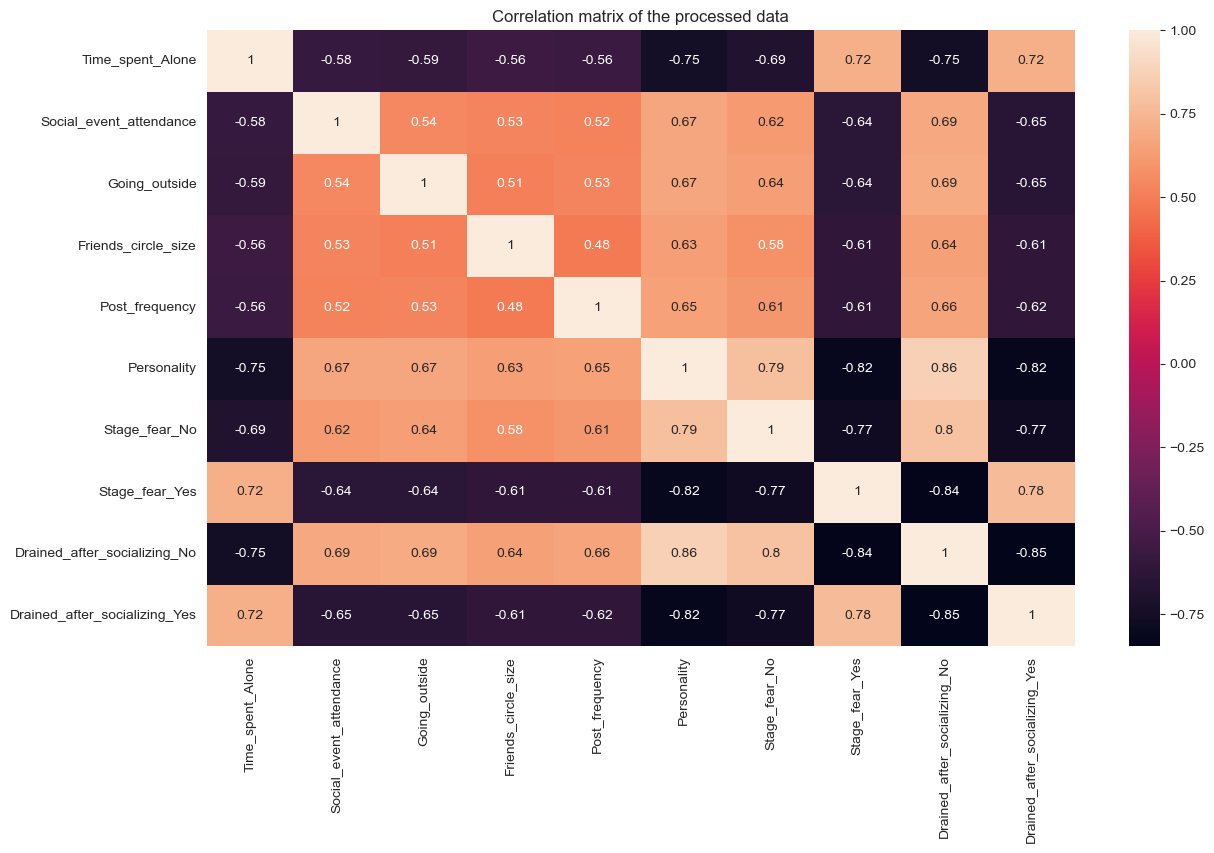

In [133]:
plt.figure(figsize=(14, 8))
sns.heatmap(data=corr_matrix, annot=True)
plt.title("Correlation matrix of the processed data")
plt.show()

**observation:**
- from the above visual, we can deduce that each of the features re strongly correlated to the targert variable.

In [134]:
# Model Development

In [135]:
X_train = processed_train.drop(columns="Personality")
y_train = processed_train.Personality
y_train

train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1, random_state=42)

In [136]:
rf = RandomForestClassifier(random_state=1)
rf_model = rf.fit(X_train, y_train)

In [137]:
rf_pred = rf.predict(val_X)
rf_pred[:4]

array([1, 1, 1, 1])

In [138]:
# model evaluation
acc_score = accuracy_score(rf_pred, val_y)
print(f"The accuracy score of the validating data is {acc_score:.2f}")

error = 1-acc_score
print(f"The error rate is {error:.2f}")

The accuracy score of the validating data is 0.99
The error rate is 0.01


In [139]:
# get the confusion matrix for the model
cm = confusion_matrix(val_y, rf_pred)

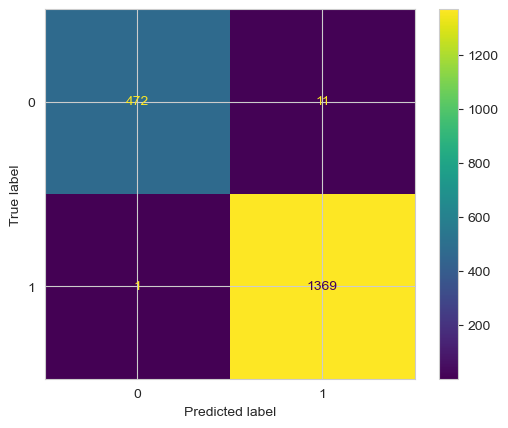

In [152]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [141]:
processed_test.drop(columns=["Stage_fear", "Drained_after_socializing"], axis=1, inplace=True)

In [153]:
test_df.Personality = rf_model.predict(processed_test)

In [154]:
test_pred[:4]

array([1, 0, 1, 1])

In [155]:
# creating my submission file
submission = pd.DataFrame({"id": test_df["id"],
            "Personality": test_df.Personality            

                          })
submission.head(5)

,id,Personality
0,18524,1
1,18525,0
2,18526,1
3,18527,1
4,18528,0


In [167]:
submission["Personality"] = submission['Personality'].map({1:"Extrovert", 0:"Introvert"})

In [168]:
submission

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [169]:

submission.to_csv("submissionK.csv", index=False)